## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  46.279002   346.480239  0.151550  5.623320  0.786819
1   0.620136  1001.742804  0.552103  9.461367  1.347737
2   0.094576   544.140637  0.866703  2.287782  1.437112
3  32.561593   449.052207  0.456629  1.767089  1.304318
4  67.671078  1165.704990  0.426416  9.376912  1.282696


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.56075 | train_mse: 5.37619 | train_mae: 1.73664 |  0:00:00s
epoch 1  | loss: 0.88272 | train_mse: 6.18429 | train_mae: 1.75703 |  0:00:00s


epoch 2  | loss: 0.61976 | train_mse: 2.50709 | train_mae: 1.12849 |  0:00:00s
epoch 3  | loss: 0.73041 | train_mse: 1.94901 | train_mae: 0.9488  |  0:00:00s
epoch 4  | loss: 0.67756 | train_mse: 1.49697 | train_mae: 0.90164 |  0:00:00s


epoch 5  | loss: 0.62928 | train_mse: 1.59493 | train_mae: 0.91946 |  0:00:00s
epoch 6  | loss: 0.46994 | train_mse: 4.04221 | train_mae: 1.31939 |  0:00:00s
epoch 7  | loss: 0.31817 | train_mse: 6.54825 | train_mae: 1.58544 |  0:00:01s


epoch 8  | loss: 0.42852 | train_mse: 4.58433 | train_mae: 1.30623 |  0:00:01s
epoch 9  | loss: 0.41571 | train_mse: 1.97863 | train_mae: 0.90749 |  0:00:01s
epoch 10 | loss: 0.32872 | train_mse: 1.56523 | train_mae: 0.85715 |  0:00:01s


epoch 11 | loss: 0.29163 | train_mse: 2.12129 | train_mae: 0.9694  |  0:00:01s
epoch 12 | loss: 0.36279 | train_mse: 1.75429 | train_mae: 0.88579 |  0:00:01s
epoch 13 | loss: 0.3668  | train_mse: 1.54857 | train_mae: 0.78997 |  0:00:01s


epoch 14 | loss: 0.4424  | train_mse: 1.23102 | train_mae: 0.69664 |  0:00:01s
epoch 15 | loss: 0.42196 | train_mse: 1.13116 | train_mae: 0.6716  |  0:00:01s


epoch 16 | loss: 0.47393 | train_mse: 0.93705 | train_mae: 0.62076 |  0:00:01s
epoch 17 | loss: 0.22735 | train_mse: 0.74872 | train_mae: 0.56039 |  0:00:01s
epoch 18 | loss: 0.23162 | train_mse: 0.92595 | train_mae: 0.62873 |  0:00:02s


epoch 19 | loss: 0.26655 | train_mse: 1.20947 | train_mae: 0.70122 |  0:00:02s
epoch 20 | loss: 0.27353 | train_mse: 1.27689 | train_mae: 0.69743 |  0:00:02s
epoch 21 | loss: 0.31604 | train_mse: 1.20597 | train_mae: 0.67677 |  0:00:02s


epoch 22 | loss: 0.3549  | train_mse: 0.84217 | train_mae: 0.57855 |  0:00:02s
epoch 23 | loss: 0.21268 | train_mse: 0.54772 | train_mae: 0.47138 |  0:00:02s
epoch 24 | loss: 0.27157 | train_mse: 0.45576 | train_mae: 0.41924 |  0:00:02s


epoch 25 | loss: 0.21063 | train_mse: 0.49581 | train_mae: 0.44187 |  0:00:02s
epoch 26 | loss: 0.30197 | train_mse: 0.60355 | train_mae: 0.48054 |  0:00:02s
epoch 27 | loss: 0.19341 | train_mse: 0.84699 | train_mae: 0.55406 |  0:00:02s


epoch 28 | loss: 0.27361 | train_mse: 0.56388 | train_mae: 0.44269 |  0:00:02s
epoch 29 | loss: 0.17924 | train_mse: 0.28907 | train_mae: 0.33506 |  0:00:02s
epoch 30 | loss: 0.22235 | train_mse: 0.2177  | train_mae: 0.32171 |  0:00:03s


epoch 31 | loss: 0.32724 | train_mse: 0.19755 | train_mae: 0.30968 |  0:00:03s
epoch 32 | loss: 0.17781 | train_mse: 0.18504 | train_mae: 0.30129 |  0:00:03s
epoch 33 | loss: 0.28855 | train_mse: 0.20686 | train_mae: 0.31515 |  0:00:03s


epoch 34 | loss: 0.21353 | train_mse: 0.2682  | train_mae: 0.32789 |  0:00:03s
epoch 35 | loss: 0.20186 | train_mse: 0.37884 | train_mae: 0.37319 |  0:00:03s
epoch 36 | loss: 0.57266 | train_mse: 0.56878 | train_mae: 0.4316  |  0:00:03s


epoch 37 | loss: 0.20806 | train_mse: 0.53237 | train_mae: 0.41983 |  0:00:03s
epoch 38 | loss: 0.24134 | train_mse: 0.32749 | train_mae: 0.36513 |  0:00:03s
epoch 39 | loss: 0.20598 | train_mse: 0.19806 | train_mae: 0.30556 |  0:00:03s


epoch 40 | loss: 0.28961 | train_mse: 0.16527 | train_mae: 0.28265 |  0:00:03s
epoch 41 | loss: 0.18729 | train_mse: 0.15396 | train_mae: 0.27011 |  0:00:04s
epoch 42 | loss: 0.34413 | train_mse: 0.1638  | train_mae: 0.26899 |  0:00:04s


epoch 43 | loss: 0.18311 | train_mse: 0.39983 | train_mae: 0.38233 |  0:00:04s
epoch 44 | loss: 0.21983 | train_mse: 0.48165 | train_mae: 0.39952 |  0:00:04s
epoch 45 | loss: 0.22462 | train_mse: 0.26089 | train_mae: 0.33303 |  0:00:04s


epoch 46 | loss: 0.17421 | train_mse: 0.19519 | train_mae: 0.29719 |  0:00:04s
epoch 47 | loss: 0.22027 | train_mse: 0.17911 | train_mae: 0.27971 |  0:00:04s


epoch 48 | loss: 0.17253 | train_mse: 0.167   | train_mae: 0.27306 |  0:00:04s
epoch 49 | loss: 0.20037 | train_mse: 0.16891 | train_mae: 0.28035 |  0:00:04s


epoch 50 | loss: 0.20284 | train_mse: 0.16715 | train_mae: 0.27324 |  0:00:05s
epoch 51 | loss: 0.20432 | train_mse: 0.22302 | train_mae: 0.31686 |  0:00:05s
epoch 52 | loss: 0.21253 | train_mse: 0.19118 | train_mae: 0.29438 |  0:00:05s


epoch 53 | loss: 0.1869  | train_mse: 0.15953 | train_mae: 0.27136 |  0:00:05s
epoch 54 | loss: 0.29239 | train_mse: 0.15731 | train_mae: 0.2689  |  0:00:05s
epoch 55 | loss: 0.22534 | train_mse: 0.15728 | train_mae: 0.26297 |  0:00:05s


epoch 56 | loss: 0.23595 | train_mse: 0.20101 | train_mae: 0.29121 |  0:00:05s
epoch 57 | loss: 0.19036 | train_mse: 0.32488 | train_mae: 0.3499  |  0:00:05s
epoch 58 | loss: 0.18847 | train_mse: 0.38295 | train_mae: 0.38421 |  0:00:05s


epoch 59 | loss: 0.26174 | train_mse: 0.28541 | train_mae: 0.3398  |  0:00:05s
epoch 60 | loss: 0.25069 | train_mse: 0.28098 | train_mae: 0.33273 |  0:00:05s
epoch 61 | loss: 0.18131 | train_mse: 0.24888 | train_mae: 0.31968 |  0:00:05s


epoch 62 | loss: 0.21839 | train_mse: 0.24333 | train_mae: 0.3177  |  0:00:06s
epoch 63 | loss: 0.183   | train_mse: 0.20909 | train_mae: 0.29457 |  0:00:06s
epoch 64 | loss: 0.24303 | train_mse: 0.17324 | train_mae: 0.2666  |  0:00:06s


epoch 65 | loss: 0.31957 | train_mse: 0.1837  | train_mae: 0.29644 |  0:00:06s
epoch 66 | loss: 0.32208 | train_mse: 0.17694 | train_mae: 0.28359 |  0:00:06s
epoch 67 | loss: 0.28965 | train_mse: 0.1829  | train_mae: 0.28731 |  0:00:06s


epoch 68 | loss: 0.50644 | train_mse: 0.19677 | train_mae: 0.32065 |  0:00:06s
epoch 69 | loss: 0.18681 | train_mse: 0.18193 | train_mae: 0.30661 |  0:00:06s
epoch 70 | loss: 0.186   | train_mse: 0.20343 | train_mae: 0.31922 |  0:00:06s


epoch 71 | loss: 0.25021 | train_mse: 0.38853 | train_mae: 0.37464 |  0:00:06s
epoch 72 | loss: 0.23138 | train_mse: 0.16584 | train_mae: 0.27507 |  0:00:06s
epoch 73 | loss: 0.19856 | train_mse: 0.24724 | train_mae: 0.32571 |  0:00:06s


epoch 74 | loss: 0.23392 | train_mse: 0.39175 | train_mae: 0.39428 |  0:00:07s
epoch 75 | loss: 0.24538 | train_mse: 0.42724 | train_mae: 0.40818 |  0:00:07s


epoch 76 | loss: 0.18824 | train_mse: 0.43935 | train_mae: 0.40104 |  0:00:07s
epoch 77 | loss: 0.16346 | train_mse: 0.34023 | train_mae: 0.34811 |  0:00:07s
epoch 78 | loss: 0.207   | train_mse: 0.25546 | train_mae: 0.31562 |  0:00:07s


epoch 79 | loss: 0.3359  | train_mse: 0.22693 | train_mae: 0.2927  |  0:00:07s
epoch 80 | loss: 0.25763 | train_mse: 0.23793 | train_mae: 0.29392 |  0:00:07s


epoch 81 | loss: 0.20214 | train_mse: 0.23981 | train_mae: 0.29903 |  0:00:07s
epoch 82 | loss: 0.15303 | train_mse: 0.17328 | train_mae: 0.27999 |  0:00:07s
epoch 83 | loss: 0.298   | train_mse: 0.14306 | train_mae: 0.25561 |  0:00:07s


epoch 84 | loss: 0.12593 | train_mse: 0.25838 | train_mae: 0.31917 |  0:00:08s
epoch 85 | loss: 0.20184 | train_mse: 0.31207 | train_mae: 0.33967 |  0:00:08s
epoch 86 | loss: 0.11605 | train_mse: 0.40987 | train_mae: 0.36743 |  0:00:08s


epoch 87 | loss: 0.3124  | train_mse: 0.47194 | train_mae: 0.38361 |  0:00:08s
epoch 88 | loss: 0.19922 | train_mse: 0.48338 | train_mae: 0.39435 |  0:00:08s
epoch 89 | loss: 0.11386 | train_mse: 0.52788 | train_mae: 0.41058 |  0:00:08s


epoch 90 | loss: 0.15979 | train_mse: 0.54879 | train_mae: 0.41257 |  0:00:08s
epoch 91 | loss: 0.1586  | train_mse: 0.53908 | train_mae: 0.40911 |  0:00:08s
epoch 92 | loss: 0.13371 | train_mse: 0.55622 | train_mae: 0.41453 |  0:00:08s


epoch 93 | loss: 0.17769 | train_mse: 0.60195 | train_mae: 0.43226 |  0:00:08s
epoch 94 | loss: 0.17099 | train_mse: 0.61026 | train_mae: 0.42863 |  0:00:08s
epoch 95 | loss: 0.09291 | train_mse: 0.61275 | train_mae: 0.42975 |  0:00:08s


epoch 96 | loss: 0.11311 | train_mse: 0.62403 | train_mae: 0.43626 |  0:00:09s
epoch 97 | loss: 0.16444 | train_mse: 0.63976 | train_mae: 0.45114 |  0:00:09s
epoch 98 | loss: 0.21125 | train_mse: 0.49579 | train_mae: 0.39685 |  0:00:09s


epoch 99 | loss: 0.11661 | train_mse: 0.35394 | train_mae: 0.33504 |  0:00:09s
epoch 100| loss: 0.14152 | train_mse: 0.27457 | train_mae: 0.2906  |  0:00:09s
epoch 101| loss: 0.13817 | train_mse: 0.3733  | train_mae: 0.33469 |  0:00:09s


epoch 102| loss: 0.11469 | train_mse: 0.41702 | train_mae: 0.35072 |  0:00:09s
epoch 103| loss: 0.06699 | train_mse: 0.43767 | train_mae: 0.36073 |  0:00:09s
epoch 104| loss: 0.25783 | train_mse: 0.45855 | train_mae: 0.37517 |  0:00:09s


epoch 105| loss: 0.20016 | train_mse: 0.3673  | train_mae: 0.36056 |  0:00:09s
epoch 106| loss: 0.12162 | train_mse: 0.08175 | train_mae: 0.19776 |  0:00:09s
epoch 107| loss: 0.10428 | train_mse: 0.15129 | train_mae: 0.24565 |  0:00:09s


epoch 108| loss: 0.11228 | train_mse: 0.22544 | train_mae: 0.29112 |  0:00:10s
epoch 109| loss: 0.12335 | train_mse: 0.274   | train_mae: 0.3033  |  0:00:10s
epoch 110| loss: 0.14101 | train_mse: 0.26668 | train_mae: 0.30146 |  0:00:10s


epoch 111| loss: 0.17468 | train_mse: 0.21078 | train_mae: 0.29519 |  0:00:10s
epoch 112| loss: 0.10947 | train_mse: 0.15411 | train_mae: 0.27914 |  0:00:10s
epoch 113| loss: 0.14046 | train_mse: 0.13725 | train_mae: 0.24973 |  0:00:10s


epoch 114| loss: 0.12142 | train_mse: 0.13877 | train_mae: 0.24347 |  0:00:10s
epoch 115| loss: 0.1176  | train_mse: 0.13178 | train_mae: 0.24895 |  0:00:10s
epoch 116| loss: 0.1052  | train_mse: 0.09107 | train_mae: 0.19997 |  0:00:10s


epoch 117| loss: 0.11887 | train_mse: 0.07247 | train_mae: 0.18138 |  0:00:10s
epoch 118| loss: 0.09006 | train_mse: 0.06997 | train_mae: 0.18536 |  0:00:10s
epoch 119| loss: 0.07392 | train_mse: 0.06066 | train_mae: 0.18499 |  0:00:10s


epoch 120| loss: 0.08241 | train_mse: 0.06663 | train_mae: 0.19298 |  0:00:11s
epoch 121| loss: 0.11963 | train_mse: 0.0849  | train_mae: 0.21079 |  0:00:11s
epoch 122| loss: 0.09482 | train_mse: 0.1037  | train_mae: 0.22827 |  0:00:11s


epoch 123| loss: 0.21153 | train_mse: 0.11468 | train_mae: 0.22931 |  0:00:11s
epoch 124| loss: 0.09744 | train_mse: 0.09865 | train_mae: 0.21067 |  0:00:11s
epoch 125| loss: 0.12039 | train_mse: 0.0686  | train_mae: 0.19474 |  0:00:11s


epoch 126| loss: 0.07159 | train_mse: 0.07284 | train_mae: 0.20405 |  0:00:11s
epoch 127| loss: 0.08964 | train_mse: 0.06902 | train_mae: 0.20213 |  0:00:11s
epoch 128| loss: 0.1112  | train_mse: 0.0703  | train_mae: 0.21436 |  0:00:11s


epoch 129| loss: 0.08109 | train_mse: 0.08753 | train_mae: 0.21815 |  0:00:11s
epoch 130| loss: 0.1153  | train_mse: 0.15723 | train_mae: 0.25296 |  0:00:11s
epoch 131| loss: 0.25248 | train_mse: 0.17118 | train_mae: 0.25759 |  0:00:12s


epoch 132| loss: 0.10704 | train_mse: 0.21296 | train_mae: 0.27741 |  0:00:12s
epoch 133| loss: 0.17682 | train_mse: 0.29715 | train_mae: 0.30546 |  0:00:12s
epoch 134| loss: 0.08551 | train_mse: 0.32659 | train_mae: 0.318   |  0:00:12s


epoch 135| loss: 0.06104 | train_mse: 0.33697 | train_mae: 0.32373 |  0:00:12s
epoch 136| loss: 0.18157 | train_mse: 0.17481 | train_mae: 0.27612 |  0:00:12s
epoch 137| loss: 0.12296 | train_mse: 0.08813 | train_mae: 0.21965 |  0:00:12s


epoch 138| loss: 0.12061 | train_mse: 0.10925 | train_mae: 0.22599 |  0:00:12s
epoch 139| loss: 0.09259 | train_mse: 0.24902 | train_mae: 0.31069 |  0:00:12s


epoch 140| loss: 0.08922 | train_mse: 0.31126 | train_mae: 0.33815 |  0:00:12s
epoch 141| loss: 0.16955 | train_mse: 0.22774 | train_mae: 0.28563 |  0:00:12s
epoch 142| loss: 0.10956 | train_mse: 0.14284 | train_mae: 0.24012 |  0:00:12s
epoch 143| loss: 0.15844 | train_mse: 0.16274 | train_mae: 0.25578 |  0:00:13s


epoch 144| loss: 0.19855 | train_mse: 0.12366 | train_mae: 0.22738 |  0:00:13s
epoch 145| loss: 0.0883  | train_mse: 0.08807 | train_mae: 0.1947  |  0:00:13s
epoch 146| loss: 0.19659 | train_mse: 0.12069 | train_mae: 0.22686 |  0:00:13s


epoch 147| loss: 0.12397 | train_mse: 0.14692 | train_mae: 0.24041 |  0:00:13s
epoch 148| loss: 0.11967 | train_mse: 0.11215 | train_mae: 0.23001 |  0:00:13s


epoch 149| loss: 0.09163 | train_mse: 0.09561 | train_mae: 0.22044 |  0:00:13s
epoch 150| loss: 0.10589 | train_mse: 0.09102 | train_mae: 0.21791 |  0:00:13s


epoch 151| loss: 0.11799 | train_mse: 0.09661 | train_mae: 0.2256  |  0:00:13s
epoch 152| loss: 0.08419 | train_mse: 0.17228 | train_mae: 0.25694 |  0:00:14s
epoch 153| loss: 0.12273 | train_mse: 0.20656 | train_mae: 0.27099 |  0:00:14s


epoch 154| loss: 0.29632 | train_mse: 0.22619 | train_mae: 0.28012 |  0:00:14s
epoch 155| loss: 0.11697 | train_mse: 0.15905 | train_mae: 0.25037 |  0:00:14s
epoch 156| loss: 0.0799  | train_mse: 0.1723  | train_mae: 0.26554 |  0:00:14s


epoch 157| loss: 0.09137 | train_mse: 0.20382 | train_mae: 0.27946 |  0:00:14s
epoch 158| loss: 0.2714  | train_mse: 0.12773 | train_mae: 0.24427 |  0:00:14s
epoch 159| loss: 0.08078 | train_mse: 0.07087 | train_mae: 0.20207 |  0:00:14s


epoch 160| loss: 0.13749 | train_mse: 0.06419 | train_mae: 0.19108 |  0:00:14s
epoch 161| loss: 0.11044 | train_mse: 0.06695 | train_mae: 0.19576 |  0:00:14s
epoch 162| loss: 0.06677 | train_mse: 0.05872 | train_mae: 0.18558 |  0:00:14s


epoch 163| loss: 0.12065 | train_mse: 0.06196 | train_mae: 0.1828  |  0:00:14s
epoch 164| loss: 0.1433  | train_mse: 0.06049 | train_mae: 0.17766 |  0:00:15s
epoch 165| loss: 0.06963 | train_mse: 0.07781 | train_mae: 0.19826 |  0:00:15s


epoch 166| loss: 0.22402 | train_mse: 0.09833 | train_mae: 0.21062 |  0:00:15s
epoch 167| loss: 0.18302 | train_mse: 0.09032 | train_mae: 0.20737 |  0:00:15s
epoch 168| loss: 0.08702 | train_mse: 0.06756 | train_mae: 0.19068 |  0:00:15s


epoch 169| loss: 0.11723 | train_mse: 0.04498 | train_mae: 0.15653 |  0:00:15s
epoch 170| loss: 0.06035 | train_mse: 0.05283 | train_mae: 0.16469 |  0:00:15s
epoch 171| loss: 0.08862 | train_mse: 0.07477 | train_mae: 0.1934  |  0:00:15s


epoch 172| loss: 0.12709 | train_mse: 0.06732 | train_mae: 0.18521 |  0:00:15s
epoch 173| loss: 0.21161 | train_mse: 0.06491 | train_mae: 0.18653 |  0:00:15s
epoch 174| loss: 0.06126 | train_mse: 0.08225 | train_mae: 0.20773 |  0:00:15s


epoch 175| loss: 0.08335 | train_mse: 0.14898 | train_mae: 0.24991 |  0:00:15s
epoch 176| loss: 0.08554 | train_mse: 0.23964 | train_mae: 0.28912 |  0:00:16s
epoch 177| loss: 0.07215 | train_mse: 0.21199 | train_mae: 0.28222 |  0:00:16s


epoch 178| loss: 0.18455 | train_mse: 0.14846 | train_mae: 0.25874 |  0:00:16s
epoch 179| loss: 0.08336 | train_mse: 0.08706 | train_mae: 0.21188 |  0:00:16s
epoch 180| loss: 0.16208 | train_mse: 0.05379 | train_mae: 0.17794 |  0:00:16s


epoch 181| loss: 0.07536 | train_mse: 0.04486 | train_mae: 0.1527  |  0:00:16s
epoch 182| loss: 0.09503 | train_mse: 0.22725 | train_mae: 0.28136 |  0:00:16s
epoch 183| loss: 0.29889 | train_mse: 0.45096 | train_mae: 0.36474 |  0:00:16s


epoch 184| loss: 0.11905 | train_mse: 0.54395 | train_mae: 0.40049 |  0:00:16s
epoch 185| loss: 0.09628 | train_mse: 0.86411 | train_mae: 0.48437 |  0:00:16s
epoch 186| loss: 0.07317 | train_mse: 0.82047 | train_mae: 0.47812 |  0:00:16s


epoch 187| loss: 0.12029 | train_mse: 0.6477  | train_mae: 0.43283 |  0:00:17s
epoch 188| loss: 0.08221 | train_mse: 0.4004  | train_mae: 0.35491 |  0:00:17s
epoch 189| loss: 0.09304 | train_mse: 0.32844 | train_mae: 0.32666 |  0:00:17s


epoch 190| loss: 0.08259 | train_mse: 0.32231 | train_mae: 0.31598 |  0:00:17s
epoch 191| loss: 0.06606 | train_mse: 0.19298 | train_mae: 0.25521 |  0:00:17s
epoch 192| loss: 0.16597 | train_mse: 0.11781 | train_mae: 0.21667 |  0:00:17s


epoch 193| loss: 0.07497 | train_mse: 0.05937 | train_mae: 0.16614 |  0:00:17s
epoch 194| loss: 0.06028 | train_mse: 0.04917 | train_mae: 0.16043 |  0:00:17s
epoch 195| loss: 0.12203 | train_mse: 0.08511 | train_mae: 0.19544 |  0:00:17s


epoch 196| loss: 0.12432 | train_mse: 0.07343 | train_mae: 0.19033 |  0:00:17s
epoch 197| loss: 0.05865 | train_mse: 0.06079 | train_mae: 0.18476 |  0:00:17s
epoch 198| loss: 0.07076 | train_mse: 0.15377 | train_mae: 0.25243 |  0:00:17s


epoch 199| loss: 0.22678 | train_mse: 0.49905 | train_mae: 0.37362 |  0:00:18s
epoch 200| loss: 0.08999 | train_mse: 0.46891 | train_mae: 0.36377 |  0:00:18s
epoch 201| loss: 0.12273 | train_mse: 0.18902 | train_mae: 0.25785 |  0:00:18s


epoch 202| loss: 0.08523 | train_mse: 0.0793  | train_mae: 0.20135 |  0:00:18s
epoch 203| loss: 0.05541 | train_mse: 0.06519 | train_mae: 0.18879 |  0:00:18s
epoch 204| loss: 0.05544 | train_mse: 0.05712 | train_mae: 0.17706 |  0:00:18s


epoch 205| loss: 0.07212 | train_mse: 0.04949 | train_mae: 0.16935 |  0:00:18s
epoch 206| loss: 0.06588 | train_mse: 0.05877 | train_mae: 0.18109 |  0:00:18s
epoch 207| loss: 0.06714 | train_mse: 0.05252 | train_mae: 0.17395 |  0:00:18s


epoch 208| loss: 0.05111 | train_mse: 0.07907 | train_mae: 0.19359 |  0:00:18s
epoch 209| loss: 0.06365 | train_mse: 0.11085 | train_mae: 0.21646 |  0:00:19s


epoch 210| loss: 0.10226 | train_mse: 0.15636 | train_mae: 0.24369 |  0:00:19s
epoch 211| loss: 0.07081 | train_mse: 0.29538 | train_mae: 0.29401 |  0:00:19s
epoch 212| loss: 0.12956 | train_mse: 0.37143 | train_mae: 0.31567 |  0:00:19s


epoch 213| loss: 0.11172 | train_mse: 0.33733 | train_mae: 0.30239 |  0:00:19s
epoch 214| loss: 0.09094 | train_mse: 0.24911 | train_mae: 0.29553 |  0:00:19s
epoch 215| loss: 0.13245 | train_mse: 0.28381 | train_mae: 0.31973 |  0:00:19s


epoch 216| loss: 0.13219 | train_mse: 0.4426  | train_mae: 0.36269 |  0:00:19s
epoch 217| loss: 0.07605 | train_mse: 0.48498 | train_mae: 0.36767 |  0:00:19s


epoch 218| loss: 0.14259 | train_mse: 0.45597 | train_mae: 0.35692 |  0:00:19s
epoch 219| loss: 0.12343 | train_mse: 0.34047 | train_mae: 0.35198 |  0:00:19s
epoch 220| loss: 0.07528 | train_mse: 0.32868 | train_mae: 0.35312 |  0:00:20s


epoch 221| loss: 0.10809 | train_mse: 0.43274 | train_mae: 0.36807 |  0:00:20s
epoch 222| loss: 0.08456 | train_mse: 0.46532 | train_mae: 0.36871 |  0:00:20s


epoch 223| loss: 0.09982 | train_mse: 0.39858 | train_mae: 0.34108 |  0:00:20s
epoch 224| loss: 0.10166 | train_mse: 0.33286 | train_mae: 0.31166 |  0:00:20s
epoch 225| loss: 0.09713 | train_mse: 0.24199 | train_mae: 0.29254 |  0:00:20s


epoch 226| loss: 0.07242 | train_mse: 0.173   | train_mae: 0.26843 |  0:00:20s
epoch 227| loss: 0.06901 | train_mse: 0.10925 | train_mae: 0.22149 |  0:00:20s
epoch 228| loss: 0.14431 | train_mse: 0.0517  | train_mae: 0.16597 |  0:00:20s


epoch 229| loss: 0.25988 | train_mse: 0.04733 | train_mae: 0.15669 |  0:00:20s
epoch 230| loss: 0.06551 | train_mse: 0.0848  | train_mae: 0.19702 |  0:00:20s
epoch 231| loss: 0.08122 | train_mse: 0.08455 | train_mae: 0.19565 |  0:00:21s

Early stopping occurred at epoch 231 with best_epoch = 181 and best_train_mae = 0.1527
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

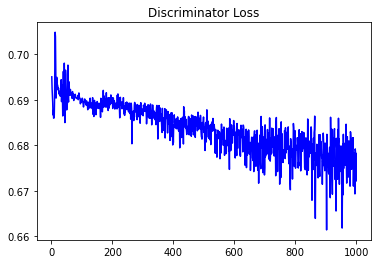

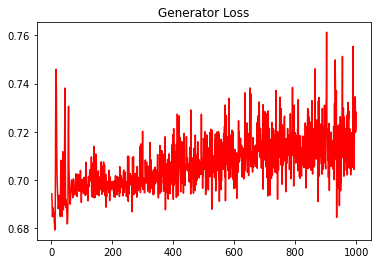

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14369863066025398


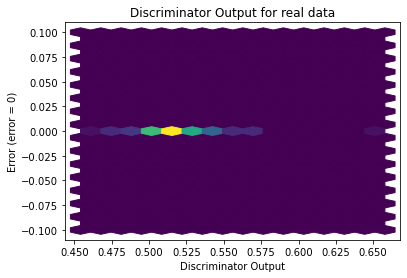

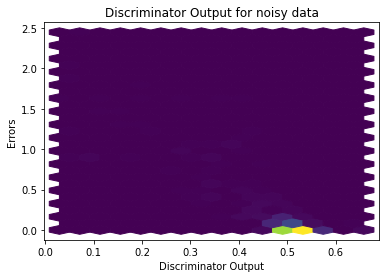

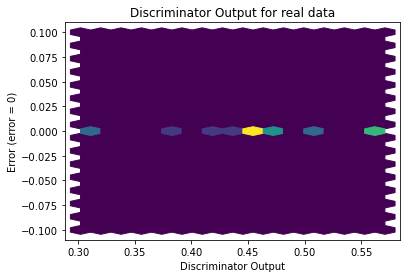

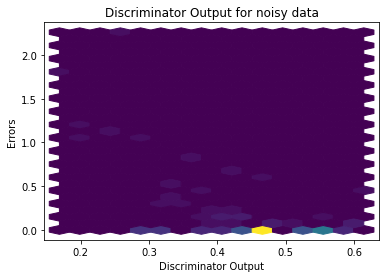

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


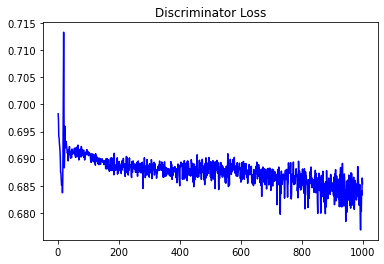

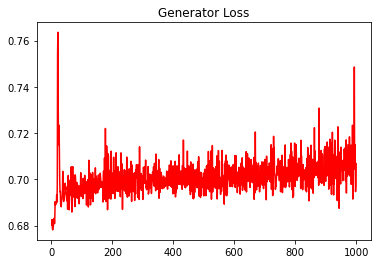

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21677900179271103


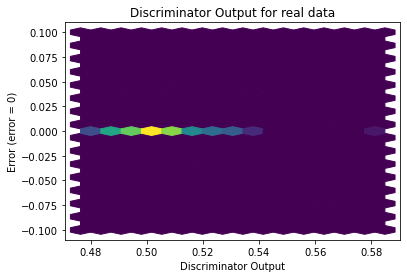

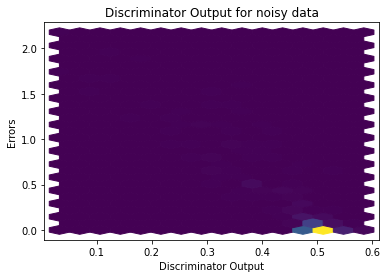

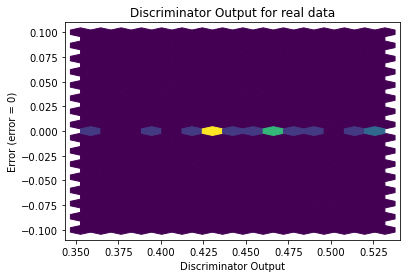

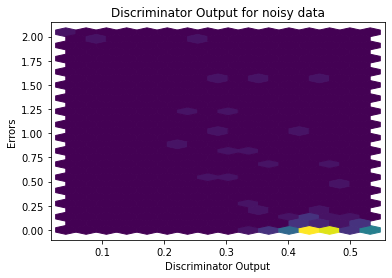

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9070]], requires_grad=True)
